# The Jaynes Cummings model
Consider a single optical field mode of frequency ω coupled to a single two-level atom.
ments a resonant energy exchange between the atom and the field.


First we define the atom basis using the spinbasis function and we define the raising, the lowering operator, and the Pauli operator

In [10]:
using QuantumOptics

b_spin = SpinBasis(1//2)
sp = sigmap(b_spin); # raising operator
sm = sigmam(b_spin); # lowering operator
sz = sigmaz(b_spin); # pauli operator

Then we define the fock basis of the field and the corresponding operators

In [11]:
b_fock = FockBasis(10)
a = destroy(b_fock);
at = create(b_fock);

We can combine the Hilbert spaces with the tensor product, and we define the Jaynes Cumming Hamiltonian $H = \omega_a \frac{\sigma_z}{2}+ \omega_c a^\dagger a + \Omega(\sigma_+a + \sigma_-a^\dagger)$, we also compute the energy spectrum for the first five eigenstates

In [12]:
ωc = 0.1
ωa = 0.1
Ω = 1.0

b_product = b_fock⊗b_spin

Hatom = ωa*sz/2
Hfield = ωc*at*a
Hint = Ω*(at⊗sm + a⊗sp)
H = identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint

Ev,ϕ = eigenstates((H+dagger(H))/2,5);


Evolution of the initial state $\psi_0 = |0>_{field}\otimes |1>_{atom}$

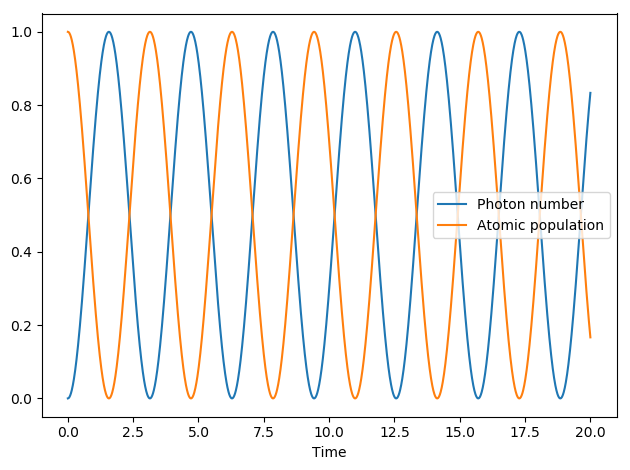

In [13]:
T = [0:0.01:20;]
vacuum = basisstate(b_fock,1)
ψ0 = vacuum⊗spinup(b_spin)
tout, ψt = timeevolution.schroedinger(T, ψ0, H)

#plot of the photon number
using PyPlot
plot(tout, expect(1, at*a, ψt),label = "Photon number")
xlabel("Time")
#ylabel("Expectation value of aa+")
tight_layout()
savefig("photon number.svg")


plot(tout, expect(2, sp*sm, ψt),label = "Atomic population")
xlabel("Time")
#ylabel("Atomic population")
tight_layout()
legend()
savefig("composite.svg")

Evolution of the intial state $|\psi> = |2>_{field} |1>_{atom}$

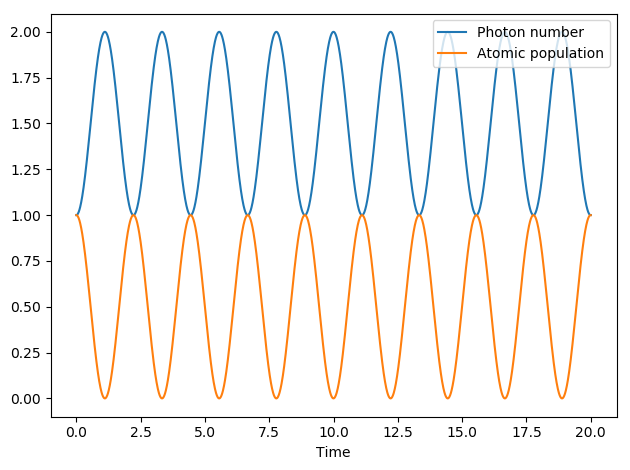

In [14]:
T = [0:0.01:20;]
vacuum = basisstate(b_fock,1)
onephoton = at*vacuum
ψ0 = onephoton⊗spinup(b_spin)
tout, ψt = timeevolution.schroedinger(T, ψ0, H)

#plot of the photon number
using PyPlot
plot(tout, expect(1, at*a, ψt),label="Photon number")
xlabel("Time")
#ylabel("Expectation value of aa+")
tight_layout()
savefig("photon number.svg")


plot(tout, expect(2, sp*sm, ψt), label = "Atomic population")
xlabel("Time")
#ylabel("Atomic population")
tight_layout()
legend()
savefig("composite.svg")

Let's try to plot the Q function ot one particular time

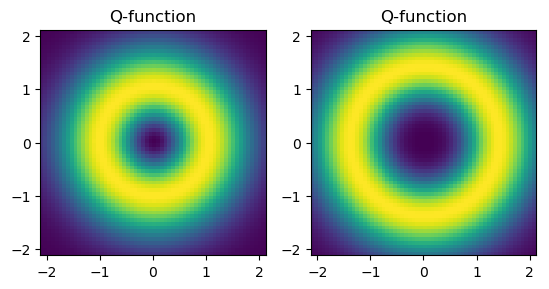

PyObject Text(0.5,1,'Q-function')

In [15]:
subplot(121)
xv = [-3:.1:3;];yv = xv; #grid for the Q function
qα = qfunc(ptrace(ψt[200],2) ,xv,yv)
pcolor(xv/sqrt(2),yv/sqrt(2),real(qα))
axis("square"); title("Q-function")
subplot(122)
qα = qfunc(ptrace(ψt[100],2) ,xv,yv)
pcolor(xv/sqrt(2),yv/sqrt(2),real(qα))
axis("square"); title("Q-function")

We can do the same for an initial coherent state

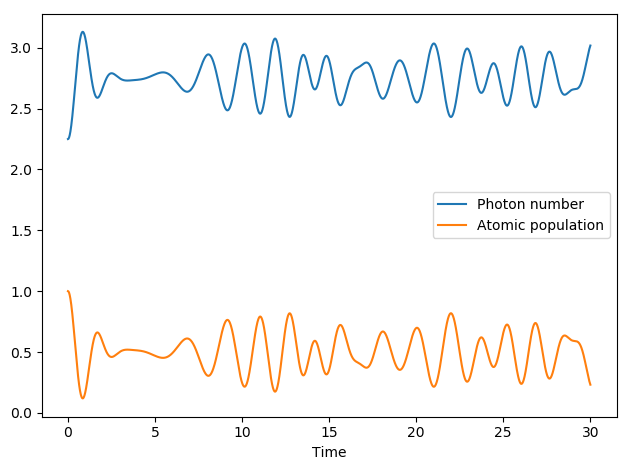

In [16]:
α = 1.5 
ψα = coherentstate(b_fock,α)
T = [0:0.01:30;]
ψ0 = ψα⊗spinup(b_spin)
tout, ψt = timeevolution.schroedinger(T, ψ0, H)

#plot of the photon number
using PyPlot
plot(tout, expect(1, at*a, ψt),label="Photon number")
xlabel("Time")
#ylabel("Expectation value of aa+")
tight_layout()
savefig("photon number.svg")


plot(tout, expect(2, sp*sm, ψt), label = "Atomic population")
xlabel("Time")
#ylabel("Atomic population")
tight_layout()
legend()
savefig("composite.svg")

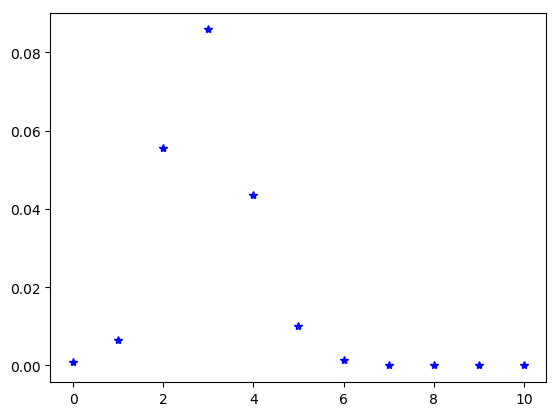

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe5ad87d898>

In [28]:
#pn = abs2.(ptrace(ψt[100],2))
funzione = diag(ptrace(ψt[100],2).data)
pn = abs2.(funzione)
plot([0:10;],pn,"b*")

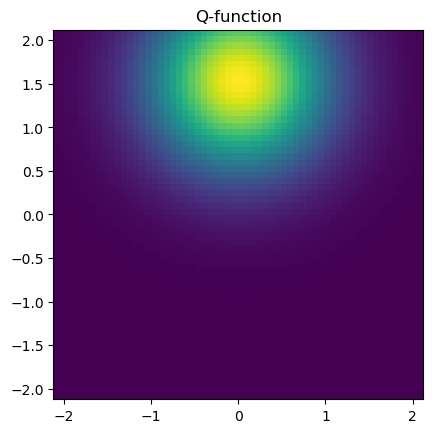

PyObject Text(0.5,1,'Q-function')

In [36]:
xv = [-3:.1:3;];yv = xv; #grid for the Q function
qα = qfunc(ptrace(ψt[10],2) ,xv,yv)
pcolor(xv/sqrt(2),yv/sqrt(2),real(qα))
axis("square"); title("Q-function")

Now we can add a cavity to our model. We introduce a jump operator $\gamma \sigma_-$, and we solve the master equation

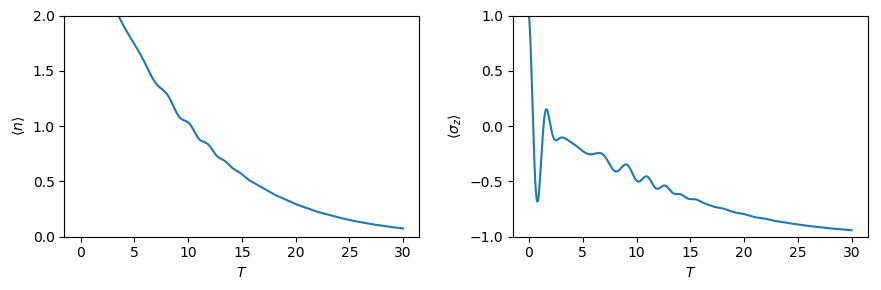

In [35]:
k = 0.5
J = [sqrt(k)*identityoperator(b_fock) ⊗ sm];
# Master
n = number(b_fock)
tout, ρt = timeevolution.master(T, ψ0, H, J)
exp_n_master = real(expect(n ⊗ identityoperator(b_spin), ρt))
exp_sz_master = real(expect(identityoperator(b_fock) ⊗ sz, ρt))

figure(figsize=(9,3))
subplot(1,2,1)
ylim([0, 2])
plot(T, exp_n_master);
xlabel(L"T")
ylabel(L"\langle n \rangle")

subplot(1,2,2)
ylim([-1, 1])
plot(T, exp_sz_master);
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");

tight_layout();

We can also add a pumping field inside the cavity, so we modify our hamiltonia by adding the term $\eta(a+a^\dagger)$ and solve the dynamics

In [38]:
η = 0.9 # Pumping strength

H = H + η*(a+at)⊗identityoperator(b_spin)

Ev,ϕ = eigenstates((H+dagger(H))/2,5); #eigenstates and eigenvalues
tout, ρt = timeevolution.master(T, ψ0, H, J) #dynamics

SparseOperator(dim=22x22)
  basis: [Fock(cutoff=10) ⊗ Spin(1/2)]
  [1 ,  1]  =  0.05+0.0im
  [2 ,  1]  =  0.9+0.0im
  [13,  1]  =  1.0+0.0im
  [1 ,  2]  =  0.9+0.0im
  [2 ,  2]  =  0.15+0.0im
  [3 ,  2]  =  1.27279+0.0im
  [14,  2]  =  1.41421+0.0im
  [2 ,  3]  =  1.27279+0.0im
  [3 ,  3]  =  0.25+0.0im
  [4 ,  3]  =  1.55885+0.0im
  ⋮
  [8 , 20]  =  2.82843+0.0im
  [19, 20]  =  2.54558+0.0im
  [20, 20]  =  0.75+0.0im
  [21, 20]  =  2.7+0.0im
  [9 , 21]  =  3.0+0.0im
  [20, 21]  =  2.7+0.0im
  [21, 21]  =  0.85+0.0im
  [22, 21]  =  2.84605+0.0im
  [10, 22]  =  3.16228+0.0im
  [21, 22]  =  2.84605+0.0im
  [22, 22]  =  0.95+0.0im